![SEC logo](images/sec.jpeg)

# Dataset Simulation

In [2]:
import pandas as pd #For Data Manipulation
import numpy as np #For Numerical calculations
import matplotlib.pyplot as plt #For graphical representations
import seaborn as sns #For graphical representations

## Investigating SEC Data

I took some summary statistics from the State Examinations Commission and put that data into a CSV file. This file contains the 2018 Leaving Cert Higher, Ordinary and Foundation Level results by gender, in Maths and English. I initially compared results in different subjects by gender, before settling on Leaving Cert Ordinary Level Maths. 

I am very familiar with the Leaving Cert Maths course and the factors influencing students attainment. I plan to investigate these factors, and simulate data to determine if my experiences and current research can be modelled effectively.

In [3]:
#Read SEC Data
df = pd.read_csv('data/2018lc-math-english.csv')
#Select Rows 8 to 15 and Columns 0 to 5
y = df.loc[8:15]
y = y.iloc[:, 0:5]

#Get rid of the existing index and replace with 1 to 9
#Now the index will match grade categories 
y = y.reset_index(drop = True)
y = y.set_index(np.arange(1, 9))

#Show df table
y

,Grade,Level,2018-total-maths,2018-female-maths,2018-male-maths
1,1,O,482,314,168
2,2,O,3392,1979,1413
3,3,O,6484,3524,2960
4,4,O,7551,3981,3570
5,5,O,6348,3260,3088
6,6,O,4062,1948,2114
7,7,O,1870,868,1002
8,8,O,1147,436,711


In [4]:
# Creating dfs for female and male students, and grades
fem_mat = pd.DataFrame(y.loc[:,'2018-female-maths'])
mal_mat = pd.DataFrame(y.loc[:,'2018-male-maths'])
grade = np.array(y.loc[:, 'Grade'])

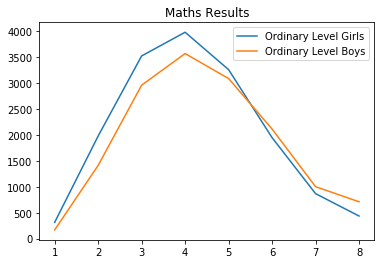

In [5]:
plt.title('Maths Results')
plt.plot(grade, fem_mat, label = 'Ordinary Level Girls')
plt.plot(grade, mal_mat, label = 'Ordinary Level Boys')
plt.legend()
plt.show()

In [6]:
# How many girls sat LCOL in 2018
totalgirl = (np.sum(fem_mat)).tolist()
print('The total number of female candidates: ', totalgirl)

The total number of female candidates:  [16310]


In [7]:
# How many boys sat LCOL in 2018
totalboy = (np.sum(mal_mat)).tolist()
print('The total number of male candidates: ', totalboy)

The total number of male candidates:  [15026]


In [8]:
# Total number of LCOL candidates
bestpupil = y.loc[:, '2018-total-maths']
sum_total = np.sum(bestpupil)

print('The total number of candidates: ', sum_total)

The total number of candidates:  31336


In [9]:
# Percentage of students achieving each grade
all_percents = pd.DataFrame(np.round(bestpupil/sum_total*100, decimals = 2))
print(all_percents)

   2018-total-maths
1              1.54
2             10.82
3             20.69
4             24.10
5             20.26
6             12.96
7              5.97
8              3.66


In [10]:
o4 = 1.538167+10.824611+20.691856+24.096885
print('Percentage of Students Awarded an O4 or higher grade: %0.2f %% ' % o4 )

Percentage of Students Awarded an O4 or higher grade: 57.15 % 


In [11]:
# Set x to be in the range 0 - 8
x = np.arange(0, 8)

In [12]:
#For rows 0 to 7 in female results, calculate %
bestgirl = (fem_mat.iloc[x])
print(np.round(bestgirl/totalgirl*100, decimals= 2))

   2018-female-maths
1               1.93
2              12.13
3              21.61
4              24.41
5              19.99
6              11.94
7               5.32
8               2.67


In [13]:
girls_o4 = 1.925199+12.133660+21.606376+24.408338
print('Percentage of Female Students Awarded an O4 or higher grade: %0.2f %% ' % girls_o4 )

Percentage of Female Students Awarded an O4 or higher grade: 60.07 % 


In [14]:
#For rows 0 to 7 in female results, calculate %
bestboy = (mal_mat.iloc[x])
print(np.round(bestboy/totalboy*100, decimals = 2))

   2018-male-maths
1             1.12
2             9.40
3            19.70
4            23.76
5            20.55
6            14.07
7             6.67
8             4.73


In [15]:
boys_o4 = 1.118062+9.403700+19.699188+23.758818
print('Percentage of Students Awarded an O4 or higher grade: %0.2f %% ' % boys_o4)

Percentage of Students Awarded an O4 or higher grade: 53.98 % 


As the data I have here, is ordinal and categorical, I can't calculate the mean. From my percentages above, and the fact my data is ordered by descending grade awards, I can see that the median grade for both female and male is an O4.

In this year approximately 57% of students were awarded an O4 or higher grade. 

60% of female students received 04 or higher grades, and 54% of male students. 

## Simulating Data

From my experience working in the education sector, I know that assessment grades are often normally distributed. 

If I assume that the set of Leaving Cert Results are normally distributed, then I would expect my mean, median and mode to have very similar values. In a perfect normal distribution they would be the same, but that would be unlikely to be the case here. So I can use the median O4 grade, observed in my investigation, to make inferences about a possible mean, and use this to generate normally distributed data.

I will begin my investigation with 100 female and 100 male students and I will try to match numercial results to gender 

### Generating numercial and categorical results data by Gender

In [181]:
# Generate random female results with mean in the high O4 interval
sim_girls = np.round(np.random.normal(355, 82, 100), decimals = 0)
sim_girls = np.clip(sim_girls, 0, 600)

#Generate random male results with mean in the low O4 interval
sim_boys = np.round(np.random.normal(340, 78, 100), decimals = 0)
sim_boys = np.clip(sim_boys, 0, 600)

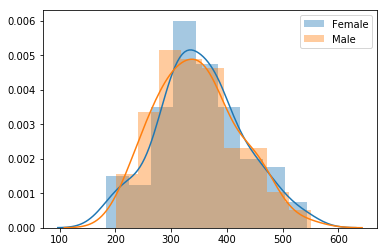

In [171]:
#Graphically display data to look for errors
#Such as results over 600 or under 0
# No fails etc.
sns.distplot(sim_girls, label = 'Female');
sns.distplot(sim_boys, label = 'Male');
plt.legend();


In [172]:
#Adding simulated data to data frame(female)
df = pd.DataFrame(sim_girls, columns=['Result'])
#Adding simulated data to df(male)
df2 = pd.DataFrame(sim_boys, columns=['Result'])
#Combining both datasets in same column of the same df
#Note this df has only one col, Result
df = df.append(df2, ignore_index=True)
df

,Result
0,417.0
1,226.0
2,351.0
3,213.0
4,340.0
5,185.0
6,326.0
7,408.0
8,356.0
9,438.0


In [173]:
#Cutting and assigning label to existing df col, Result
c = pd.cut(
    df.stack(), [0, 180, 240, 300, 360,  420, 480, 540, 600], 
    labels=['08', 'O7', 'O6', 'O5', 'O4', 'O3', 'O2', 'O1'])
#Create df, df2, with two cols, Result and Result_grade
df2 = pd.DataFrame(df.join(c.unstack().add_suffix('_grade')))

#Taking the Result_grade column only, name it df2
df2 = pd.Series.to_frame(df2.loc[:, 'Result_grade'])
#Reference:https://stackoverflow.com/questions/44659040/pandas-assign-category-based-on-where-value-falls-in-range

In [174]:
# Generating dfs with 100 strings, first female, then male
string_female = pd.DataFrame(['female']*100)
string_male = pd.DataFrame(['male']*100)
# Combining both dfs to the same df column, named gender
gender = string_female.append(string_male, ignore_index=True)

In [175]:
# Adding gender col to existing df
df['Gender'] = gender

In [176]:
df

,Result,Gender
0,417.0,female
1,226.0,female
2,351.0,female
3,213.0,female
4,340.0,female
5,185.0,female
6,326.0,female
7,408.0,female
8,356.0,female
9,438.0,female


In [177]:
df = df.join(df2)
df

,Result,Gender,Result_grade
0,417.0,female,O4
1,226.0,female,O7
2,351.0,female,O5
3,213.0,female,O7
4,340.0,female,O5
5,185.0,female,O7
6,326.0,female,O5
7,408.0,female,O4
8,356.0,female,O5
9,438.0,female,O3


In [178]:
sum_cats = df["Result_grade"].value_counts()
perc = sum_cats/200*100
perc

O5    29.5
O4    24.0
O6    20.5
O3    13.0
O7     7.5
O2     4.5
O1     1.0
08     0.0
Name: Result_grade, dtype: float64

In [179]:
# Taking girls in simulated data, count each grade
girls = df.loc[0:99]
sum_girls = girls["Result_grade"].value_counts()
# As I have 100 data points, my sum is equal to my percentage
sum_girls

O5    30
O4    26
O6    16
O3    12
O7     9
O2     6
O1     1
08     0
Name: Result_grade, dtype: int64

In [180]:
# Taking boys in simulated data, count each grade
boys = df.loc[100:199]
sum_boys = boys["Result_grade"].value_counts()
# As I have 100 data points, my sum is equal to my percentage
sum_boys

O5    29
O6    25
O4    22
O3    14
O7     6
O2     3
O1     1
08     0
Name: Result_grade, dtype: int64

In [160]:
gender = df['Gender']
df.groupby(['Gender']).describe()

Result                                                       
        count    mean        std    min     25%    50%    75%    max
Gender                                                              
female  100.0  362.97  78.369683  178.0  321.25  364.5  419.5  539.0
male    100.0  329.28  68.425596  155.0  286.75  322.0  368.0  548.0

### Generating categorical data for how Leaving Certs spend their free time

Now that I have 200 results for students, I will start to add other variables that may or have been found to impact student attainment. 

The next variable I will examine is time spent studying versus other activities. In sixth year 60% of young women compared with 28% of young men report that they spend most of their free time studying. 

In [74]:
# Strings to represent the percentage of each
girls_study = (['study']*60)
girls_dont = (['other']*40)
boys_study = (['study']*28)
boys_dont = (['other']*72)

In [75]:
# Combining the four lists of strings into one dataframe, df_
df_ = pd.DataFrame({'Freetime':girls_study})
df3 = pd.DataFrame({'Freetime':girls_dont})
df_ = df_.append(df3, ignore_index=True)
df_ = df_.sample(frac=1)
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_.reset_index()

df3 = pd.DataFrame({'Freetime':boys_dont})
df4 = pd.DataFrame({'Freetime':boys_study})
df4 = df4.append(df3, ignore_index=True)
df4 = df4.sample(frac=1)
df4.reset_index()

df_ = df_.append(df4, ignore_index=True)
freetime = pd.Series(df_['Freetime'])

In [76]:
# Joining df_ to simulation df
df['Freetime'] = freetime.values

#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727
df

,Result,Gender,Result_grade,Freetime
0,160.0,female,08,other
1,516.0,female,O2,other
2,460.0,female,O3,other
3,337.0,female,O5,other
4,212.0,female,O7,other
5,600.0,female,O1,other
6,373.0,female,O4,study
7,360.0,female,O5,study
8,172.0,female,08,study
9,440.0,female,O3,study


In [77]:
df.groupby(['Freetime']).describe()

Result                                                           
          count        mean        std    min     25%    50%    75%    max
Freetime                                                                  
other     112.0  350.339286  96.974554  149.0  277.75  344.0  413.0  600.0
study      88.0  354.056818  92.065239  164.0  293.75  354.5  417.0  600.0

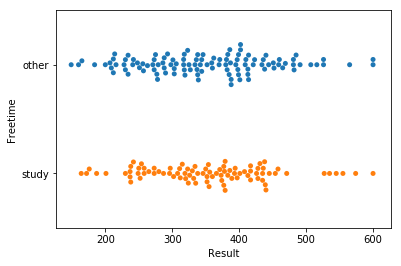

In [78]:
sns.swarmplot(x="Result", y="Freetime", data=df);

### Generating numerical data measuring attendance

### Problems Arising and Evaluation of Success

**Simulating Results:**
- I initially simulated my female data with a mean of 340 and standard deviation of 100. My male data was simulated with a mean of 315 and the same standard deviation. I ran this simulation several times, and found that my total results showed higher rates of failure and smaller numbers of students achieving the top grades of O1 and O2. Looking at male and female candidates separately I found that both data sets had similar discrepancies. 

- Attempts to adjust this with a higher mean, lead to too many students getting the highest grade O1, while the other grades were more in line with my research. Similar problems when I adjusted the deviation. 

- Next step look at distributions that approximate the normal distribution.


**Generating Categorical Freetime data:** 
- Once data was genereated, I plotted on a swarmplot to see if it matched acccepted research. It didn't; students who spent most of free time studying were actually less likely to pass. And students who didn't study were just as likely to get the highest grade. 
- I needed to find a way to match this data randomly, in such a way that students with the highest grade results would be more likely to spend most of their time studying.

Other factors to consider 
- Attendance 
    
    Let's say that between Sept and December of sixth year a study (that I did, and can't provide data for) shows that the average absences for LC students is 7days. Students have shown that the majority of students only miss between 0 and 5 days. Data is not kept on students who miss over 20 days. They are grouped together, for reasons... So with mean 7, so far, and the knowledge that most of my data is close to zero, I could get a distribution to model LC school attendance. 
    
    I know studies have shown that increased school attendance leads to increased attainment. 
    
    Issue: School absences don't include other reasons for missing school; suspensions, school activity, signing out or in (ie. half-days), students on reduced timetables etc.
    
    
- Deis vs Non Deis School, Free School Meals vs None. Both of these would give an indication on how socio economic status impacts attainment, but understandably data is not easily accessible. 
- Age (may indicate students repeating, starting school at early age, skipping optional TY and other factors)
- Among those who sit the Leaving Certificate, 49% of females and 42% of males have taken grinds.

## References

* [State Examinations Commission - Annual Exams Statistics](https://www.examinations.ie/statistics/?l=en&mc=st&sc=r11)
* [A Social Portrait of Children in Ireland](https://www.esri.ie/pubs/BKMNEXT097.pdf)